In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import random as rd

In [2]:
data= pd.read_csv("CC_GENERAL.csv")
data = data.drop(['CUST_ID'], axis=1)
print(data.shape)
data.head()

(8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS          313
CREDIT_LIMIT                1
BALANCE                     0
CASH_ADVANCE_FREQUENCY      0
PRC_FULL_PAYMENT            0
dtype: int64

In [4]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=0
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=0

In [5]:
data.isnull().sum().sort_values(ascending=False).head()

BALANCE                   0
CASH_ADVANCE_FREQUENCY    0
PRC_FULL_PAYMENT          0
MINIMUM_PAYMENTS          0
PAYMENTS                  0
dtype: int64

In [6]:

scale = StandardScaler()
X = scale.fit_transform(data)
X.shape

(8950, 17)

In [64]:
X

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.2973097 ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.10204243,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.08848934,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32175099,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33316552,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.31923775,
        -0.52555097, -4.12276757]])

In [62]:
# plt.scatter(X[:,0],X[:,1])

In [8]:

class Kmeans:
    def __init__(self, X, K):
        self.X = X
        self.Output = {}
        self.Centroids = np.array([]).reshape(self.X.shape[1], 0)
        self.K = K
        self.m = self.X.shape[0]

    def kmeanspp(self, X, K):
        i = rd.randint(0, X.shape[0])
        Centroid_temp = np.array([X[i]])
        for k in range(1, K):
            D = np.array([])
            for x in X:
                D = np.append(D, np.min(np.sum((x - Centroid_temp)**2)))
            prob = D / np.sum(D)
            c_prob = np.cumsum(prob)
            r = rd.random()
            i = 0
            for j, p in enumerate(c_prob):
                if r < p:
                    i = j   
                    break
            Centroid_temp = np.append(Centroid_temp, [X[i]], axis=0)
        return Centroid_temp.T

    def fit(self, n_iter):
        # Randomly Initialize the centroids
        self.Centroids = self.kmeanspp(self.X, self.K)

        for n in range(n_iter):
            EuclideanDistance = np.array([]).reshape(self.m, 0)
            for k in range(self.K):
                tempDist = np.linalg.norm(self.X - self.Centroids[:, k].reshape(1, -1), axis=1)
                EuclideanDistance = np.c_[EuclideanDistance, tempDist]
            C = np.argmin(EuclideanDistance, axis=1) + 1
            Y = {}
            for k in range(self.K):
                Y[k + 1] = np.array([]).reshape(self.X.shape[1], 0)
            for i in range(self.m):
                Y[C[i]] = np.c_[Y[C[i]], self.X[i]]

            for k in range(self.K):
                Y[k + 1] = Y[k + 1].T 
            for k in range(self.K):
                self.Centroids[:, k] = np.mean(Y[k + 1], axis=0)

            self.Output = Y

    def predict(self):
        return self.Output, self.Centroids.T

    # def WCSS(self):
    #     wcss = 0
    #     for k in range(self.K):
    #         wcss += np.sum(np.linalg.norm(
    #             self.Output[k + 1] - self.Centroids[:, k], axis=1)**2)
    #     return wcss



In [9]:
m=X.shape[0]
n_iter=200

In [10]:
# to find optimum number of clusters use elbow method
WCSS_array=np.array([])
for K in range(1,11):
    kmeans=Kmeans(X,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)

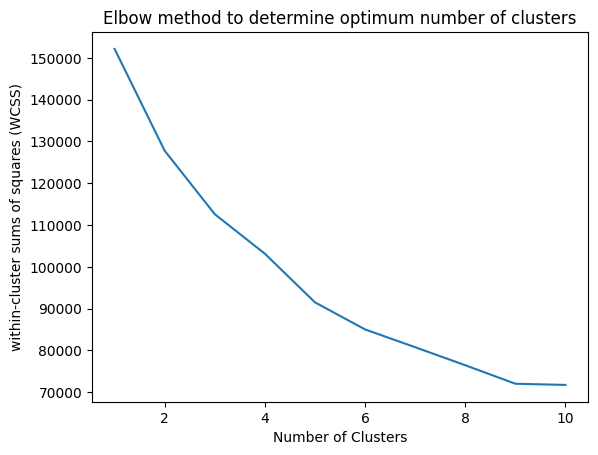

In [11]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

In [12]:
bestK = 5
print('Optimal K value : ', bestK)

Optimal K value :  5


In [13]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), WCSS_array,
                 curve='convex', direction='decreasing')
kl.elbow


5

In [67]:
K = 5
kmeans=Kmeans(X,K)
kmeans.fit(n_iter)
Output,Centroids=kmeans.predict()
print(Output)


{1: array([[ 8.39748862e+00,  5.18083823e-01,  9.83223198e+00,
         5.33597923e+00,  1.34357504e+01, -4.66785554e-01,
         1.26984323e+00,  1.83542311e+00,  1.59919919e+00,
        -6.75348858e-01, -4.76069817e-01,  8.09816781e+00,
         3.71176005e+00,  7.35272968e+00,  7.61476901e+00,
        -5.25550971e-01,  3.60679544e-01],
       [ 1.71366294e+00,  5.18083823e-01,  1.47607525e+01,
         1.56374671e+01,  6.17202138e+00, -4.66785554e-01,
         1.26984323e+00,  2.67345108e+00,  1.59919919e+00,
        -6.75348858e-01, -4.76069817e-01,  3.35087283e+00,
         1.92541723e+00,  8.60795990e+00,  4.86821243e-01,
        -2.40635125e-01,  3.60679544e-01],
       [ 5.72437981e+00,  5.18083823e-01,  1.87441639e+01,
         2.41184111e+01,  1.68888255e-02, -4.66785554e-01,
         8.54575518e-01,  1.55608157e+00,  1.31419973e-01,
        -6.75348858e-01, -4.76069817e-01,  5.72452032e+00,
         3.43693808e+00,  1.18600238e+01,  6.45608254e+00,
        -2.40635125e-01, 

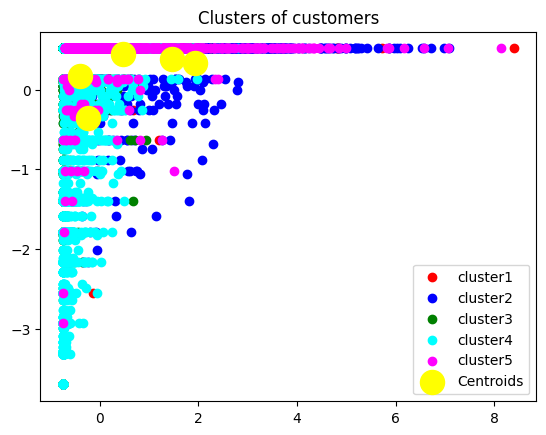

In [69]:
color = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:, 0], Output[k+1]
                [:, 1], c=color[k], label=labels[k])
plt.scatter(Centroids[:, 0], Centroids[:, 1],
            s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

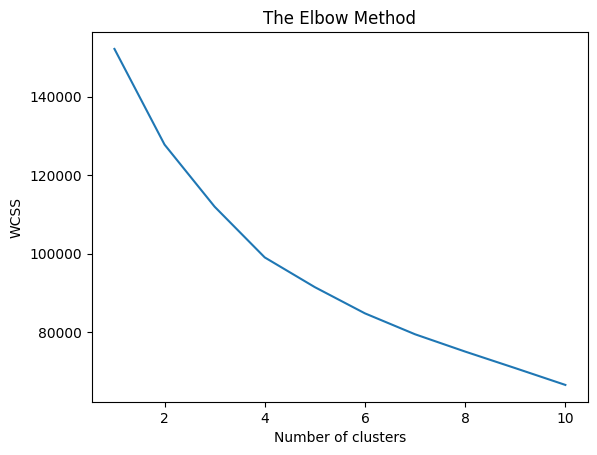

In [46]:
from sklearn.cluster import KMeans

wcss = []
cluster = []
for i in range(1, 11):
    kmeans = KMeans(max_iter=200,n_clusters = i, init = 'k-means++', random_state = 42)
    # kmeans.fit(X)
    cluster.append(kmeans.fit_predict(X))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
bestK = 5
print('Optimal K value : ', bestK)

Optimal K value :  5


In [23]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
print(kl.elbow+1)

5


In [50]:
temp = pd.DataFrame(cluster[kl.elbow])
temp.value_counts()

2    3913
3    2416
0    1383
1    1152
4      86
Name: count, dtype: int64

In [59]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(X)

AttributeError: 'Kmeans' object has no attribute 'cluster_centers_'

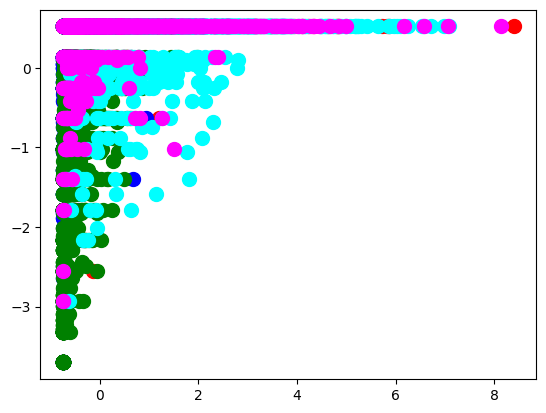

In [73]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1],
            s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1],
            s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [17]:

# class Kmeans:
#     def __init__(self,X,K):
#         self.X=X
#         self.Output={}
#         self.Centroids=np.array([]).reshape(self.X.shape[1],0)
#         self.K=K
#         self.m=self.X.shape[0]

#     def kmeanspp(self,X,K):
#         i=rd.randint(0,X.shape[0])
#         Centroid_temp=np.array([X[i]])
#         for k in range(1,K):
#             D=np.array([])
#             for x in X:
#                 D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
#             prob=D/np.sum(D)
#             cummulative_prob=np.cumsum(prob)
#             r=rd.random()
#             i=0
#             for j,p in enumerate(cummulative_prob):
#                 if r<p:
#                     i=j
#                     break
#             Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
#         return Centroid_temp.T

#     def fit(self,n_iter):
#         #randomly Initialize the centroids
#         self.Centroids=self.kmeanspp(self.X,self.K)

#         #compute euclidian distances and assign clusters
#         for n in range(n_iter):
#             EuclidianDistance=np.array([]).reshape(self.m,0)
#             for k in range(self.K):
#                 tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
#                 EuclidianDistance=np.c_[EuclidianDistance,tempDist]
#             C=np.argmin(EuclidianDistance,axis=1)+1
#             #adjust the centroids
#             Y={}
#             for k in range(self.K):
#                 Y[k+1]=np.array([]).reshape(17,0)
#             for i in range(self.m):
#                 Y[C[i]]=np.c_[Y[C[i]],self.X[i]]

#             for k in range(self.K):
#                 Y[k+1]=Y[k+1].T
#             for k in range(self.K):
#                 self.Centroids[:,k]=np.mean(Y[k+1],axis=0)

#             self.Output=Y


#     def predict(self):
#         return self.Output,self.Centroids.T

#     def WCSS(self):
#         wcss=0
#         for k in range(self.K):
#             wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
#         return wcss
